
<h1><center>
EE215, Fall 2018: Coding Assignment 1 <br>
</center></h1>
$
\textbf{Written by}:\\
\small
\text{Abhishek Aich} \\
\text{SID: 862061477} \\
\texttt{aaich@ece.ucr.edu}
$   



## <span style="color:blue">Initializations:</span>

Import required packages:

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set figure size and resolution
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi']= 200

Import dataset file _adult.data.txt_ to a csv file and initialize the column names of the data set:

In [415]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num','marital_status', 'occupation', 'relationship', 'race', 'gender','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']

adult = pd.read_csv('adult.data.txt', sep=",\s", header=None, names = column_names, engine='python')

See a overview of the csv file:

In [416]:
adult.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## <span style="color:blue">1. Plot the histogram of continuous features (age, capital-gain, hours-per-week).</span> 

### a) Histogram plot of 'Age' Feature:

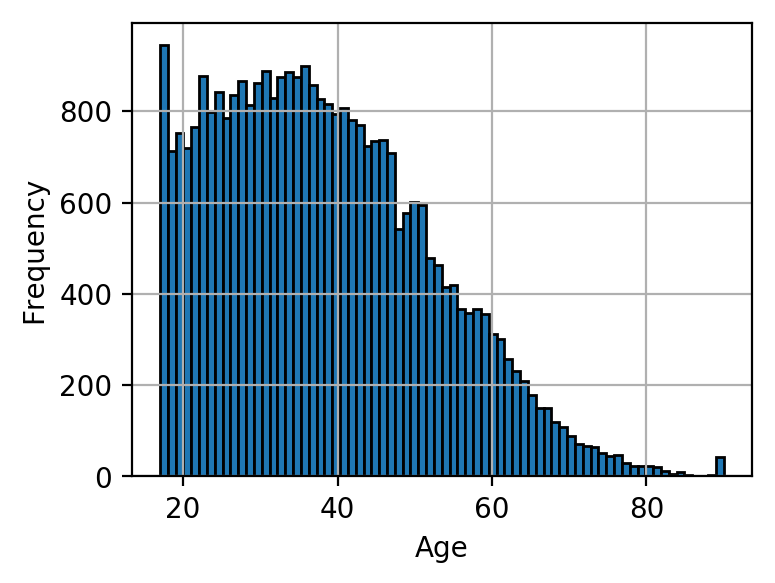

In [417]:
plt.hist(adult.age, bins=72, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('Hist_age.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()

### b) Histogram plot of 'Capital Gain' Feature:

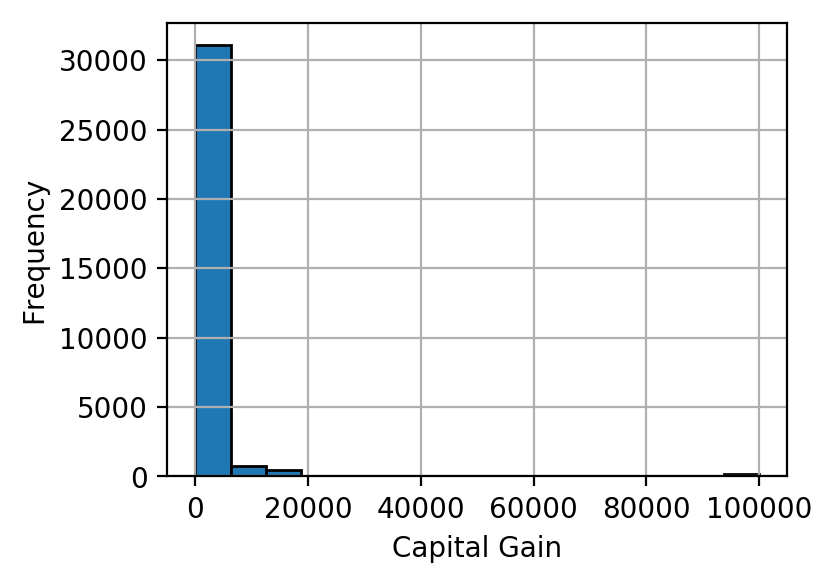

In [418]:
plt.hist(adult.capital_gain, bins='auto', edgecolor='black')
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")
plt.savefig('Hist_Capital_Gain.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()

### c) Histogram plot of 'Hours per Week' Feature:

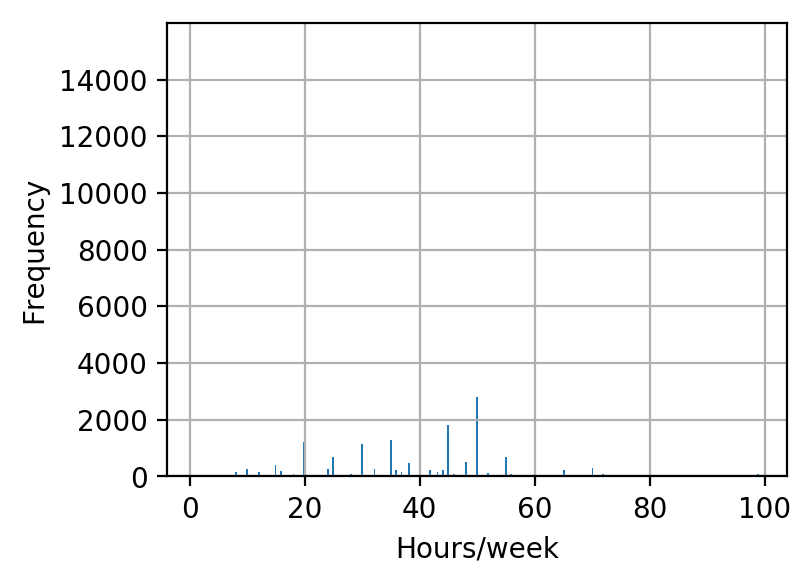

In [419]:
plt.hist(adult.hours_per_week, bins='auto')
plt.xlabel("Hours/week")
plt.ylabel("Frequency")
plt.savefig('Hist_Hour_per_week.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()

## <span style="color:blue">2. Calculate the correlation coefficient between income and each of the continuous features.</span>

$
\text{Mean, } m_X = \dfrac{\sum\limits_{i=1}^N X_i}{N}\\
\text{Variance, }\sigma^2_X = \dfrac{\sum\limits_{i=1}^N (X_i - m_X)^2}{N}\\
\text{Correlation Coefficient, }\rho_{X,Y} = \dfrac{\sum\limits_{i=1}^N (X_i - m_X)(Y_i - m_Y)}{N\sigma_X\sigma_Y}
$
<br /><br /><br />
Define function to calculate the correlation coefficient between two arrays:

In [420]:
def corr_func(colX,colY):
    # Mean m_x 
    meanX = sum(colX) / len(colX)
    # Mean m_y 
    meanY = sum(colY) / len(colY)
    
    # X_i - m_X
    A_X = colX - meanX
    # Y_i - m_Y
    B_Y = colY - meanY

    # Variance 
    sigmaX = sum(A_X**2)/len(A_X)
    sigmaY = sum(B_Y**2)/len(B_Y)

    # Correlation coefficient
    return np.dot(A_X,B_Y.T)/(np.sqrt(np.dot(sigmaX,sigmaY))*len(A_X))

Map the income range $\leq$ 50K to -1 and >50K to 1:

In [421]:
adult["income"] = adult["income"].map({ "<=50K": -1, ">50K": 1 })

### a) Correlation Coefficient between Income and Age:

In [422]:
print("Correlation Coefficient(Income, Age): " + str(corr_func(adult.age, adult.income)))

Correlation Coefficient(Income, Age): 0.2340371026487899


### b) Correlation Coefficient between Income and Hours/week:

In [423]:
print("Correlation Coefficient(Income, Hours per week): " + str(corr_func(adult.hours_per_week, adult.income)))

Correlation Coefficient(Income, Hours per week): 0.22968906567075978


### c) Correlation Coefficient between Income and Capital Gain:

In [424]:
print("Correlation Coefficient(Income, Capital Gain): " + str(corr_func(adult.capital_gain, adult.income)))

Correlation Coefficient(Income, Capital Gain): 0.2233288181953461


## <span style="color:blue">3. Calculate the correlation coefficient between income and each value of each discrete feature.</span>

### a) Correlation Coefficient between Income and each Education level :

In [425]:
adult = adult.join(pd.get_dummies(adult.education))
Education_coeff = [] 
for item in adult.education.unique():
    coeff = corr_func(adult.income, adult[item])
    Education_coeff = Education_coeff + [coeff]
    print("Correlation coefficient(Income, "+item +') :'+ str(coeff))

Correlation coefficient(Income, Bachelors) :0.1804854292020365
Correlation coefficient(Income, HS-grad) :-0.1311885440127737
Correlation coefficient(Income, 11th) :-0.08586392327838138
Correlation coefficient(Income, Masters) :0.17456971065151716
Correlation coefficient(Income, 9th) :-0.05576743851103098
Correlation coefficient(Income, Some-college) :-0.06353525542938808
Correlation coefficient(Income, Assoc-acdm) :0.0032502892468201194
Correlation coefficient(Income, Assoc-voc) :0.01004778008131746
Correlation coefficient(Income, 7th-8th) :-0.059524094983747285
Correlation coefficient(Income, Doctorate) :0.1325720058095709
Correlation coefficient(Income, Prof-school) :0.15490683578933565
Correlation coefficient(Income, 5th-6th) :-0.04582616682401701
Correlation coefficient(Income, 10th) :-0.07003784087284089
Correlation coefficient(Income, 1st-4th) :-0.034543988289949534
Correlation coefficient(Income, Preschool) :-0.02230684230054624
Correlation coefficient(Income, 12th) :-0.04469017

### b) Correlation Coefficient between Income and each Workclass level :

In [426]:
adult = adult.join(pd.get_dummies(adult.workclass))
WorkClass_coeff = []
for item in adult.workclass.unique():
    coeff = corr_func(adult.income, adult[item])
    WorkClass_coeff = WorkClass_coeff + [coeff]
    print("Correlation coefficient(Income, "+item +') :'+ str(coeff))

Correlation coefficient(Income, State-gov) :0.014843290616534367
Correlation coefficient(Income, Self-emp-not-inc) :0.030019053961917834
Correlation coefficient(Income, Private) :-0.07852827453621923
Correlation coefficient(Income, Federal-gov) :0.059371745431758466
Correlation coefficient(Income, Local-gov) :0.033090571544139497
Correlation coefficient(Income, ?) :-0.07819838250884364
Correlation coefficient(Income, Self-emp-inc) :0.13946655734051583
Correlation coefficient(Income, Without-pay) :-0.011680731190577383
Correlation coefficient(Income, Never-worked) :-0.008258636174575805


### c) Correlation Coefficient between Income and each Marital Status :

In [427]:
adult = adult.join(pd.get_dummies(adult.marital_status))
MaritalStatus_coeff = []
for item in adult.marital_status.unique():
    coeff = corr_func(adult.income, adult[item])
    MaritalStatus_coeff = MaritalStatus_coeff + [coeff]
    print("Correlation coefficient(Income, "+item +') :'+ str(coeff))

Correlation coefficient(Income, Never-married) :-0.31844032507361325
Correlation coefficient(Income, Married-civ-spouse) :0.44469615504624616
Correlation coefficient(Income, Divorced) :-0.12699499612582316
Correlation coefficient(Income, Married-spouse-absent) :-0.04253155700134002
Correlation coefficient(Income, Separated) :-0.07438622703105471
Correlation coefficient(Income, Married-AF-spouse) :0.01206139838059629
Correlation coefficient(Income, Widowed) :-0.06438127591305995


### d) Correlation Coefficient between Income and each Relationship type :

In [428]:
adult = adult.join(pd.get_dummies(adult.relationship))
Relationship_coeff = []
for item in adult.relationship.unique():
    coeff = corr_func(adult.income, adult[item])
    Relationship_coeff = Relationship_coeff + [coeff]
    print("Correlation coefficient(Income, "+item +') :'+ str(coeff))

Correlation coefficient(Income, Not-in-family) :-0.1884973713038891
Correlation coefficient(Income, Husband) :0.40103526357732605
Correlation coefficient(Income, Wife) :0.1232635397279952
Correlation coefficient(Income, Own-child) :-0.22853196347375496
Correlation coefficient(Income, Unmarried) :-0.14285726137187282
Correlation coefficient(Income, Other-relative) :-0.08371649655545484


### e) Correlation Coefficient between Income and each Gender type :

In [429]:
adult = adult.join(pd.get_dummies(adult.gender))
Gender_coeff = []
for item in adult.gender.unique():
    coeff = corr_func(adult.income, adult[item])
    Gender_coeff = Gender_coeff + [coeff]
    print("Correlation coefficient(Income, "+item +') :'+ str(coeff))

Correlation coefficient(Income, Male) :0.21598015058403583
Correlation coefficient(Income, Female) :-0.21598015058403583


## <span style="color:blue">4. For each discrete feature, create a bar plot where x-axis is the feature values and y-axis is the correlation coefficients obtained</span>

### a) Feature: Education

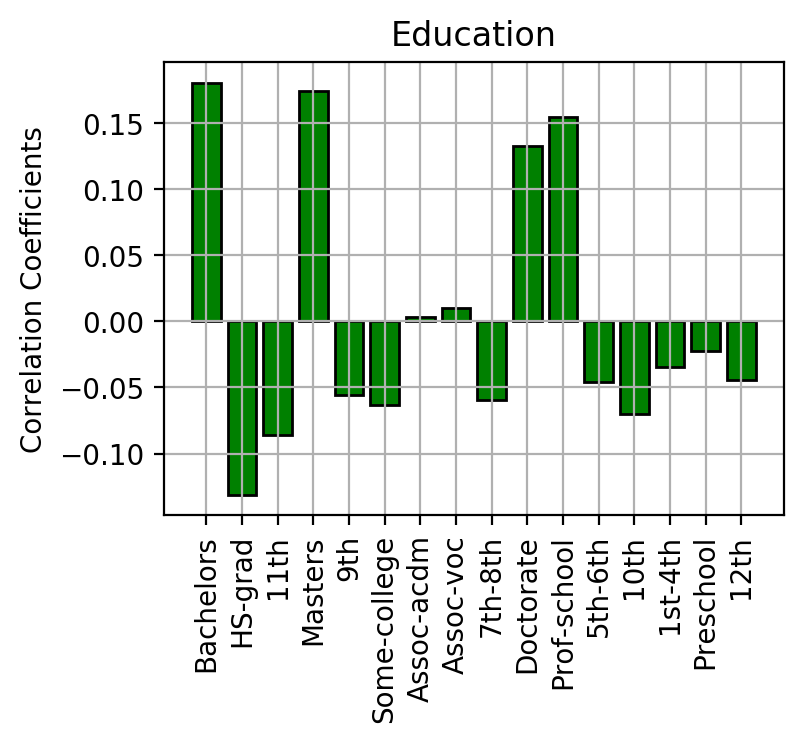

In [430]:
plt.bar(adult.education.unique(),Education_coeff, edgecolor='black', color=['green'])
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficients')
plt.title('Education')
plt.savefig('Corr_coeff_education.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()

## b) Feature: Workclass

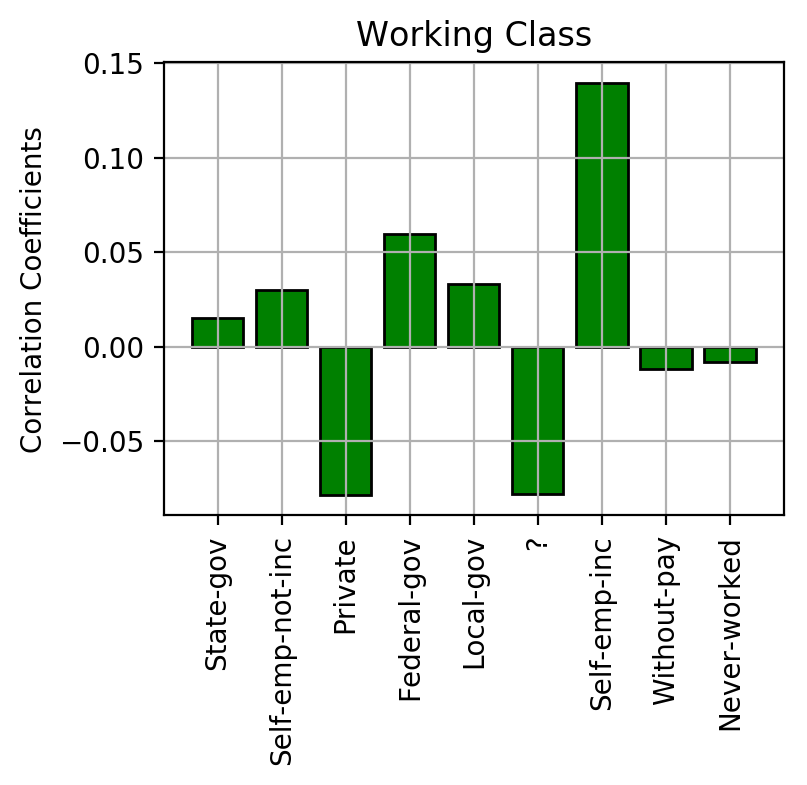

In [431]:
plt.bar(adult.workclass.unique(),WorkClass_coeff, edgecolor='black',color=['green'])
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficients')
plt.title('Working Class')
plt.savefig('Corr_coeff_workclass.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()

## c) Feature: Marital Status

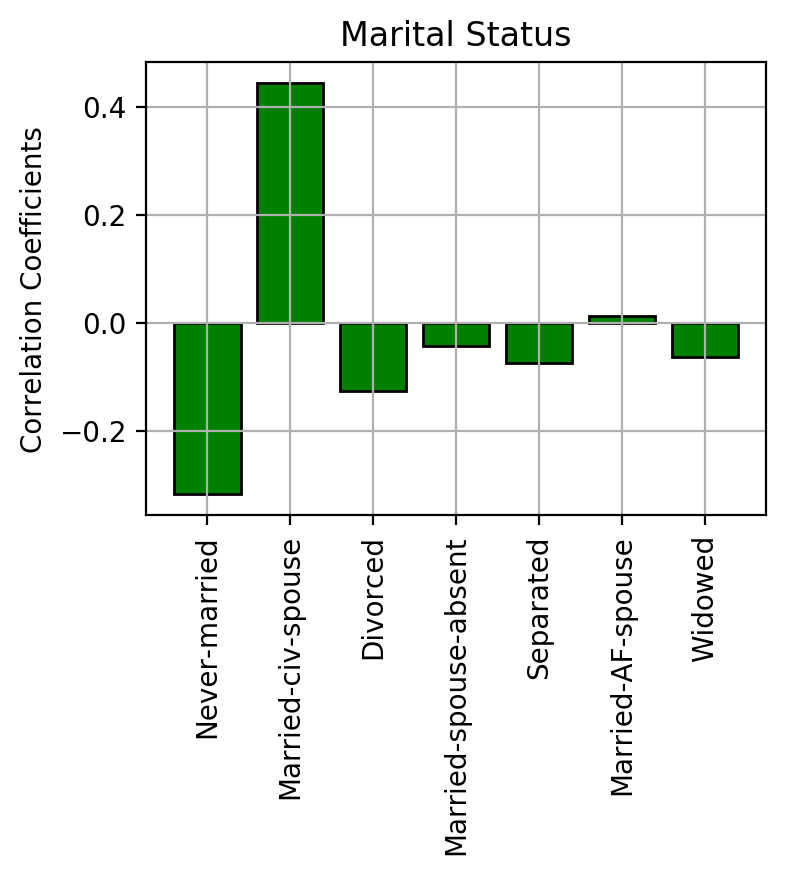

In [432]:
plt.bar(adult.marital_status.unique(),MaritalStatus_coeff, edgecolor='black', color=['green'])
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficients')
plt.title('Marital Status')
plt.savefig('Corr_coeff_Martial_Status.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()

## d) Feature: Relationship

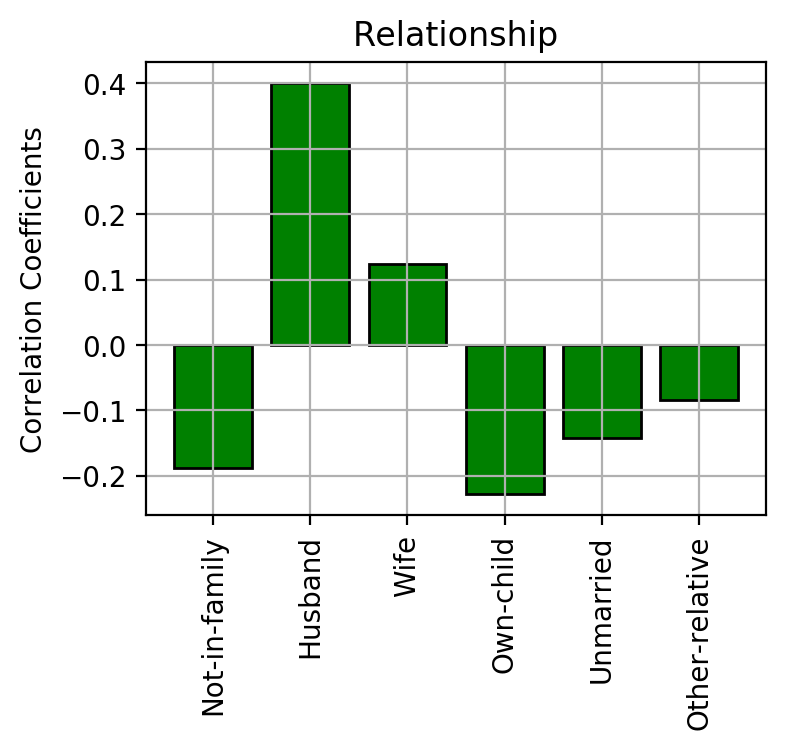

In [433]:
plt.bar(adult.relationship.unique(),Relationship_coeff, edgecolor='black',color=['green'])
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficients')
plt.title('Relationship')
plt.savefig('Corr_coeff_relationship.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()

## e) Feature: Gender

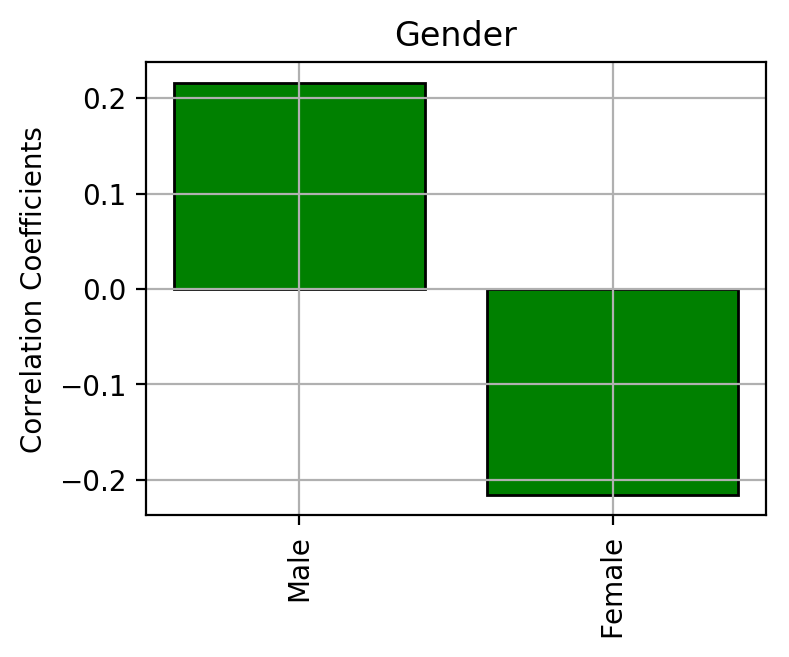

In [434]:
plt.bar(adult.gender.unique(),Gender_coeff, edgecolor='black', color=['green'])
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficients')
plt.title('Gender')
plt.savefig('Corr_coeff_gender.pdf',bbox_inches = 'tight')
plt.grid(True)
plt.show()